# Pritish Budhiraja
# 1805317
# House Loki

In [1]:
"""
Importing important libraries like numpy, pandas, matplotlib, seaborn, datetime.
Warning is also imported to remove unnecessary warnings and filter them out.
sklearn is also imported that provide many supervised and unsupervised learning algorithm and metrics
to check the accuracy of those algorithms.
"""
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt
from datetime import datetime
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=FutureWarning)

from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import r2_score

In [2]:
"""
Importing the invoice dataset(1805317.csv) in the invoiceData dataframe.
"""
invoiceData=pd.read_csv(r"1805317.csv")
invoiceData.head() # for displaying the first 5 rows of the dataset

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,200769623,WAL-MAR trust,2019-07-29 00:00:00,2019.0,1.929612e+09,2019-07-17,20190712,20190717,20190801.0,USD,RV,1.0,NaN,14777.25,20190717.0,NAH4,1.929612e+09,0
1,U001,0200726979,BJ'S us,2019-08-01 00:00:00,2019.0,1.929625e+09,2019-07-17,20190716,20190717,20190801.0,USD,RV,1.0,NaN,454.27,20190717.0,NAA8,1.929625e+09,0
2,U001,0200875006,KROGER co,2019-12-09 00:00:00,2019.0,1.930190e+09,2019-11-24,20191124,20191124,20191209.0,USD,RV,1.0,NaN,117929.61,20191124.0,NAA8,1.930190e+09,0
3,U001,0200331749,SYSC in,2019-08-09 00:00:00,2019.0,1.929635e+09,2019-07-24,20190718,20190724,20190808.0,USD,RV,1.0,NaN,5380.53,20190724.0,NAA8,1.929635e+09,0
4,U001,0200795490,HY - foundation,2019-11-18 00:00:00,2019.0,1.929970e+09,2019-10-05,20191005,20191005,20191114.0,USD,RV,1.0,NaN,4825.26,20191005.0,NAWU,1.929970e+09,0


In [3]:
print("The columns of the invoiveData dataframe that contain some NULL information are: ")
print([col for col in invoiceData.columns if invoiceData[col].isnull().sum()>0])
invoiceData.isnull().sum()

The columns of the invoiveData dataframe that contain some NULL information are: 
['clear_date', 'area_business', 'invoice_id']


business_code                 0
cust_number                   0
name_customer                 0
clear_date                 3326
buisness_year                 0
doc_id                        0
posting_date                  0
document_create_date          0
document_create_date.1        0
due_in_date                   0
invoice_currency              0
document type                 0
posting_id                    0
area_business             50000
total_open_amount             0
baseline_create_date          0
cust_payment_terms            0
invoice_id                    6
isOpen                        0
dtype: int64

In [4]:
"""
As we can see the area_business column is whole NULL that means it will not providing any inference to the model
So we will remove this column.
And one more thing we can see that we have document_create_date and document_create_date.1 that .1 is added by python 
to distinguish it from others but the original csv has the same name so we can drop anyone of it.
So I'm dropping the document_create_date
"""
invoiceData.drop(columns=["area_business", "document_create_date"],inplace=True)

In [5]:
"""
We can also observe that there are 6 are rows of invoice_id that are NULL.
So let's try to handle that.
There is also another column document_id as I have observed that almost all values of the document_id 
are equal to the invoice_id.
Let's verify.
"""
invoiceData[invoiceData["doc_id"]-invoiceData["invoice_id"]!=0]

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
26939,CA02,0140104223,H Y LO corporation,2019-05-08 00:00:00,2019.0,9.500000e+09,2019-04-30,20190329,20190408.0,CAD,X2,1.0,27816.00,20190329.0,CA10,NaN,0
33868,CA02,0140104409,LOB,2019-12-27 00:00:00,2019.0,9.500000e+09,2019-03-29,20181030,20181109.0,CAD,X2,1.0,383.64,20181030.0,CA10,NaN,0
38640,CA02,0140106054,TREE llc,2019-05-09 00:00:00,2019.0,9.500000e+09,2019-03-29,20190225,20190307.0,CAD,X2,1.0,5896.80,20190225.0,CA10,NaN,0
38863,CA02,0100030194,AMAZO,2019-12-27 00:00:00,2019.0,9.500000e+09,2019-03-29,20190305,20190315.0,CAD,X2,1.0,313.15,20190305.0,CA10,NaN,0
39585,CA02,0140106379,QUAL associates,2019-05-08 00:00:00,2019.0,9.500000e+09,2019-04-30,20190325,20190404.0,CAD,X2,1.0,7812.00,20190325.0,CA10,NaN,0
44848,CA02,0140104409,LOB,2019-12-27 00:00:00,2019.0,9.500000e+09,2019-03-29,20181212,20181222.0,CAD,X2,1.0,628.60,20181212.0,CA10,NaN,0


In [6]:
"""
By this we can infer that those rows that have invoice_id NULL values are the ones that are not equal to the doc_id 
and it's quite obvious because you can't subtract something from NULL
"""
"""
And one more thing we can observe from the data that the document type column. Let's see.
"""
invoiceData["document type"].value_counts()

RV    49994
X2        6
Name: document type, dtype: int64

In [7]:
"""
From this we can see there are only 6 rows that have X2 document type and these are that rows that have invoice_id NULL.
Let's Verify.
"""
invoiceData[invoiceData["document type"]=="X2"]

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
26939,CA02,0140104223,H Y LO corporation,2019-05-08 00:00:00,2019.0,9.500000e+09,2019-04-30,20190329,20190408.0,CAD,X2,1.0,27816.00,20190329.0,CA10,NaN,0
33868,CA02,0140104409,LOB,2019-12-27 00:00:00,2019.0,9.500000e+09,2019-03-29,20181030,20181109.0,CAD,X2,1.0,383.64,20181030.0,CA10,NaN,0
38640,CA02,0140106054,TREE llc,2019-05-09 00:00:00,2019.0,9.500000e+09,2019-03-29,20190225,20190307.0,CAD,X2,1.0,5896.80,20190225.0,CA10,NaN,0
38863,CA02,0100030194,AMAZO,2019-12-27 00:00:00,2019.0,9.500000e+09,2019-03-29,20190305,20190315.0,CAD,X2,1.0,313.15,20190305.0,CA10,NaN,0
39585,CA02,0140106379,QUAL associates,2019-05-08 00:00:00,2019.0,9.500000e+09,2019-04-30,20190325,20190404.0,CAD,X2,1.0,7812.00,20190325.0,CA10,NaN,0
44848,CA02,0140104409,LOB,2019-12-27 00:00:00,2019.0,9.500000e+09,2019-03-29,20181212,20181222.0,CAD,X2,1.0,628.60,20181212.0,CA10,NaN,0


In [8]:
"""
And there we found that where ever there is NULL in invoice_id the document type is X2.
So let's frame into one concluding statement for this case :
Invoice id has some NULL values.
doc_id and invoice_id are same and we can keep anyone of it so let's drop anyone of it to avoid redundant data.
As invoice_id has some NULL information. So let's drop invoice_id and and if we drop the invoice_id then the 
document type X2 will be considered as a rare one as there will be only 6 values of X2 while rest are RV 
and will be treated as quasi-constant. So we can also drop the document type with invoice_id
"""
invoiceData.drop(columns=["invoice_id","document type"],inplace=True)

In [9]:
"""
But let's observe one thing, how many unique value does this doc_id has.
"""
invoiceData["doc_id"].nunique()
"""
By this we can infere that the doc_id is unique so it's just like index or help us to find the 
particular invoice but in our case it's not useful to keep this. 
Droping this column will not hamper our data. So let's drop this.
"""
invoiceData.drop(columns=["doc_id"],inplace=True)

In [10]:
"""
Let's check the data types of all the columns.
"""
invoiceData.dtypes
"""
From this we can infer that all the dates are in object format so first 
we have to convert all these dates to datetime format for doing manipulation in them.
"""

'\nFrom this we can infer that all the dates are in object format so first \nwe have to convert all these dates to datetime format for doing manipulation in them.\n'

In [11]:
invoiceData['posting_date']= pd.to_datetime(invoiceData['posting_date'],format="%Y-%m-%d")
invoiceData['document_create_date.1']= pd.to_datetime(invoiceData['document_create_date.1'],format="%Y%m%d")
invoiceData['due_in_date']= pd.to_datetime(invoiceData['due_in_date'],format="%Y%m%d")
invoiceData['baseline_create_date']= pd.to_datetime(invoiceData['baseline_create_date'],format="%Y%m%d")
invoiceData['clear_date']= pd.to_datetime(invoiceData['clear_date'],format="%Y-%m-%d %H:%M:%S")
"""
to_datetime function converts string datetime into datetime object.
"""
"""
Let's verify that the data type of the date columns are converted or not.
"""
invoiceData.dtypes

business_code                     object
cust_number                       object
name_customer                     object
clear_date                datetime64[ns]
buisness_year                    float64
posting_date              datetime64[ns]
document_create_date.1    datetime64[ns]
due_in_date               datetime64[ns]
invoice_currency                  object
posting_id                       float64
total_open_amount                float64
baseline_create_date      datetime64[ns]
cust_payment_terms                object
isOpen                             int64
dtype: object

In [12]:
"""
One more thing we can see that buisness_year is in float so we will convert it into integer format.
It will not effect something but it will look good.
"""
invoiceData["buisness_year"]=invoiceData["buisness_year"].astype("int64")
"""
Let's see how many unique values are there for buisness_year
"""
invoiceData["buisness_year"].value_counts()

2019    40435
2020     9565
Name: buisness_year, dtype: int64

In [13]:
"""
Now let's say how many unique currency we have like USD, INR, CAD etc.
"""
print(invoiceData["invoice_currency"].value_counts())
"""
Here, we can see that we have only 2 currency USD and CAD.
So, we will convert the one currency to other to make our data normalise.
"""
invoiceData.loc[invoiceData["invoice_currency"] == "CAD", "total_open_amount"] = 0.78*invoiceData["total_open_amount"]
"""
By this we can observe that, all the currency will be converted to USD as we have taken the conversion rate as 
1 CAD= 0.78 USD
So by this we can infer that the invoice_currency will not give any significant factor to us right now as all things have been converted to a single currency.
We can also convert it into CAD by having the conversion rate as 1 USD= 1.28 CAD:

invoiceData.loc[invoiceData["invoice_currency"] == "USD", "total_open_amount"] = 1.28*invoiceData["total_open_amount"]

"""
invoiceData.head()

USD    46030
CAD     3970
Name: invoice_currency, dtype: int64


,business_code,cust_number,name_customer,clear_date,buisness_year,posting_date,document_create_date.1,due_in_date,invoice_currency,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,isOpen
0,U001,200769623,WAL-MAR trust,2019-07-29,2019,2019-07-17,2019-07-17,2019-08-01,USD,1.0,14777.25,2019-07-17,NAH4,0
1,U001,0200726979,BJ'S us,2019-08-01,2019,2019-07-17,2019-07-17,2019-08-01,USD,1.0,454.27,2019-07-17,NAA8,0
2,U001,0200875006,KROGER co,2019-12-09,2019,2019-11-24,2019-11-24,2019-12-09,USD,1.0,117929.61,2019-11-24,NAA8,0
3,U001,0200331749,SYSC in,2019-08-09,2019,2019-07-24,2019-07-24,2019-08-08,USD,1.0,5380.53,2019-07-24,NAA8,0
4,U001,0200795490,HY - foundation,2019-11-18,2019,2019-10-05,2019-10-05,2019-11-14,USD,1.0,4825.26,2019-10-05,NAWU,0


In [14]:
"""
Let's observe the posting id. How many unique value does this posting_id.
"""
invoiceData["posting_id"].value_counts()

1.0    50000
Name: posting_id, dtype: int64

In [15]:
"""
As we have seen, the whole column posting_id is having one value that is 1 and it's a constant column.
So we can remove this column as it will not provide any information to our model.
Let's drop the invoice_currency as all amount are converted into a single currency and this posting_id.
"""
invoiceData.drop(columns=["invoice_currency","posting_id"],inplace=True)

In [16]:
invoiceData.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,posting_date,document_create_date.1,due_in_date,total_open_amount,baseline_create_date,cust_payment_terms,isOpen
0,U001,200769623,WAL-MAR trust,2019-07-29,2019,2019-07-17,2019-07-17,2019-08-01,14777.25,2019-07-17,NAH4,0
1,U001,0200726979,BJ'S us,2019-08-01,2019,2019-07-17,2019-07-17,2019-08-01,454.27,2019-07-17,NAA8,0
2,U001,0200875006,KROGER co,2019-12-09,2019,2019-11-24,2019-11-24,2019-12-09,117929.61,2019-11-24,NAA8,0
3,U001,0200331749,SYSC in,2019-08-09,2019,2019-07-24,2019-07-24,2019-08-08,5380.53,2019-07-24,NAA8,0
4,U001,0200795490,HY - foundation,2019-11-18,2019,2019-10-05,2019-10-05,2019-11-14,4825.26,2019-10-05,NAWU,0


In [17]:
invoiceData.dtypes

business_code                     object
cust_number                       object
name_customer                     object
clear_date                datetime64[ns]
buisness_year                      int64
posting_date              datetime64[ns]
document_create_date.1    datetime64[ns]
due_in_date               datetime64[ns]
total_open_amount                float64
baseline_create_date      datetime64[ns]
cust_payment_terms                object
isOpen                             int64
dtype: object

As we have already seen, there are 3326 rows that have NULL values in their clear_date column it means we have to predict those values so let's keep those values in seperate dataframe and not touch them.

Now Let's craete <b>two</b> dataframes: <br>
<b>1) train_invoiceData</b><br>
<b>2) test_invoiceData</b><br>
train_invoiceData: will be the dataframe where we will train,test,val and predict our accuracy and all.<br>
test_invoiceData: it will predict our final output that we desire that is the clear date of those NULL values and then we have to bucketize those values in specific range of buckets.<br>

In [18]:
"""
There is a column which tell about that our payment is done or not i.e. isOpen. 
By seeing this column we can infer that the rows having isOpen is equal to one are those that have clear date equal to NULL 
as they haven't paid their dues yet.
"""

test_invoiceData=invoiceData[invoiceData["isOpen"]==1]
train_invoiceData=invoiceData[invoiceData["isOpen"]==0]

In [19]:
"""
The index will be not in order so let's make the index correct.
"""
test_invoiceData.reset_index(drop=True,inplace=True)
train_invoiceData.reset_index(drop=True,inplace=True)

Now we will make our target column that will be the <b>No. of Day's Delayed</b> in clearing dues.<br>
It can be either positive or negative depending upon the customer.<br>
Let's say if customer has paid their dues before due_date then it will be negative and it will not be an anamoly.

In [20]:
train_invoiceData["delay"]=(train_invoiceData["clear_date"]-train_invoiceData["due_in_date"]).dt.days

In [21]:
train_invoiceData.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,posting_date,document_create_date.1,due_in_date,total_open_amount,baseline_create_date,cust_payment_terms,isOpen,delay
0,U001,200769623,WAL-MAR trust,2019-07-29,2019,2019-07-17,2019-07-17,2019-08-01,14777.25,2019-07-17,NAH4,0,-3
1,U001,0200726979,BJ'S us,2019-08-01,2019,2019-07-17,2019-07-17,2019-08-01,454.27,2019-07-17,NAA8,0,0
2,U001,0200875006,KROGER co,2019-12-09,2019,2019-11-24,2019-11-24,2019-12-09,117929.61,2019-11-24,NAA8,0,0
3,U001,0200331749,SYSC in,2019-08-09,2019,2019-07-24,2019-07-24,2019-08-08,5380.53,2019-07-24,NAA8,0,1
4,U001,0200795490,HY - foundation,2019-11-18,2019,2019-10-05,2019-10-05,2019-11-14,4825.26,2019-10-05,NAWU,0,4


In [22]:
"""
Now let's observe how many delay's are positive or negative to have a rough idea about our whole data.
"""
delay_list=train_invoiceData['delay'].value_counts().index.tolist()
pos_delay, neg_delay = 0, 0
for num in delay_list: 
    if num >= 0: 
        pos_delay += 1
    else :
        neg_delay += 1

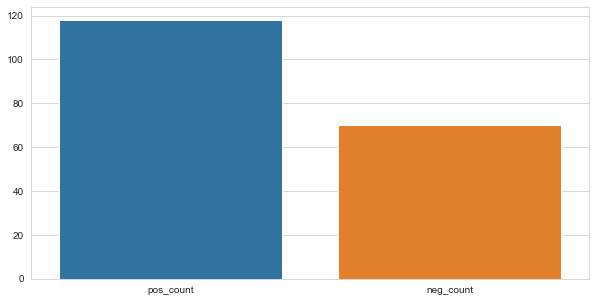

In [23]:
"""
Now let's plot this and visualise it.
"""
sns.set_style(style="whitegrid")
fig_dims = (10,5)
fig, ax = plt.subplots(figsize=fig_dims)
x = ['pos_count','neg_count']
y = [pos_delay, neg_delay]
sns.barplot(x, y, ax=ax)
plt.show()

Via graph we can observe that there are more customers who pay their dues after the due_date.

In [24]:
print(round(pos_delay/(pos_delay+neg_delay)*100,2)," percent of customer haven't paid their dues on time")
print(round(neg_delay/(pos_delay+neg_delay)*100,2),"percent of customer have paid their dues before time")

62.77  percent of customer haven't paid their dues on time
37.23 percent of customer have paid their dues before time


In [25]:
"""
Let's check that we don't have any duplicate rows. If found keep the first one and then drop the rest.
"""
duplicate_check=train_invoiceData.duplicated()
duplicate_check
duplicate_check.drop_duplicates(keep='first')
# So by this it infere that there are no rows which are exactly alike.

0        False
12782     True
dtype: bool

Now let's remove the anamolies in the dataset that we can find.<br>
This is the sequence that should be followed.<br>
<b>document_create_date.1 <= posting_date <= baseline_create_date <= due_in_date <= clear_date</b><br>
Due date will be greater than clearing date incase of negative delay.<br>
Apart from these cases everything else is an anomaly and should be removed.<br>

In [26]:
print(train_invoiceData[train_invoiceData["document_create_date.1"]>train_invoiceData["posting_date"]].shape)
train_invoiceData.drop(train_invoiceData[train_invoiceData["document_create_date.1"]>train_invoiceData["posting_date"]].index,inplace=True)

(0, 13)


In [27]:
print(train_invoiceData[train_invoiceData["document_create_date.1"]>train_invoiceData["baseline_create_date"]].shape)
train_invoiceData.drop(train_invoiceData[train_invoiceData["document_create_date.1"]>train_invoiceData["baseline_create_date"]].index,inplace=True)

(2037, 13)


In [28]:
print(train_invoiceData[train_invoiceData["document_create_date.1"]>train_invoiceData["due_in_date"]].shape)
train_invoiceData.drop(train_invoiceData[train_invoiceData["document_create_date.1"]>train_invoiceData["due_in_date"]].index,inplace=True)

(0, 13)


In [29]:
print(train_invoiceData[train_invoiceData["document_create_date.1"]>train_invoiceData["clear_date"]].shape)
train_invoiceData.drop(train_invoiceData[train_invoiceData["document_create_date.1"]>train_invoiceData["clear_date"]].index,inplace=True)

(0, 13)


In [30]:
print(train_invoiceData[train_invoiceData["posting_date"]>train_invoiceData["baseline_create_date"]].shape)
train_invoiceData.drop(train_invoiceData[train_invoiceData["posting_date"]>train_invoiceData["baseline_create_date"]].index,inplace=True)

(6, 13)


In [31]:
print(train_invoiceData[train_invoiceData["posting_date"]>train_invoiceData["due_in_date"]].shape)
train_invoiceData.drop(train_invoiceData[train_invoiceData["posting_date"]>train_invoiceData["due_in_date"]].index,inplace=True)

(0, 13)


In [32]:
print(train_invoiceData[train_invoiceData["posting_date"]>train_invoiceData["clear_date"]].shape)
train_invoiceData.drop(train_invoiceData[train_invoiceData["posting_date"]>train_invoiceData["clear_date"]].index,inplace=True)

(0, 13)


In [33]:
print(train_invoiceData[train_invoiceData["baseline_create_date"]>train_invoiceData["due_in_date"]].shape)
train_invoiceData.drop(train_invoiceData[train_invoiceData["baseline_create_date"]>train_invoiceData["due_in_date"]].index,inplace=True)

(0, 13)


In [34]:
train_invoiceData.shape

(44631, 13)

Let's test all these conditions for our test data too.

In [35]:
print(test_invoiceData[test_invoiceData["document_create_date.1"]>test_invoiceData["posting_date"]].shape)
test_invoiceData.drop(test_invoiceData[test_invoiceData["document_create_date.1"]>test_invoiceData["posting_date"]].index,inplace=True)

(0, 12)


In [36]:
print(test_invoiceData[test_invoiceData["document_create_date.1"]>test_invoiceData["baseline_create_date"]].shape)
test_invoiceData.drop(test_invoiceData[test_invoiceData["document_create_date.1"]>test_invoiceData["baseline_create_date"]].index,inplace=True)

(113, 12)


In [37]:
print(test_invoiceData[test_invoiceData["document_create_date.1"]>test_invoiceData["due_in_date"]].shape)
test_invoiceData.drop(test_invoiceData[test_invoiceData["document_create_date.1"]>test_invoiceData["due_in_date"]].index,inplace=True)

(0, 12)


In [38]:
print(test_invoiceData[test_invoiceData["document_create_date.1"]>test_invoiceData["clear_date"]].shape)
test_invoiceData.drop(test_invoiceData[test_invoiceData["document_create_date.1"]>test_invoiceData["clear_date"]].index,inplace=True)

(0, 12)


In [39]:
print(test_invoiceData[test_invoiceData["posting_date"]>test_invoiceData["baseline_create_date"]].shape)
test_invoiceData.drop(test_invoiceData[test_invoiceData["posting_date"]>test_invoiceData["baseline_create_date"]].index,inplace=True)

(0, 12)


In [40]:
print(test_invoiceData[test_invoiceData["posting_date"]>test_invoiceData["due_in_date"]].shape)
test_invoiceData.drop(test_invoiceData[test_invoiceData["posting_date"]>test_invoiceData["due_in_date"]].index,inplace=True)

(0, 12)


In [41]:
print(test_invoiceData[test_invoiceData["posting_date"]>test_invoiceData["clear_date"]].shape)
test_invoiceData.drop(test_invoiceData[test_invoiceData["posting_date"]>test_invoiceData["clear_date"]].index,inplace=True)

(0, 12)


In [42]:
print(test_invoiceData[test_invoiceData["baseline_create_date"]>test_invoiceData["due_in_date"]].shape)
test_invoiceData.drop(test_invoiceData[test_invoiceData["baseline_create_date"]>test_invoiceData["due_in_date"]].index,inplace=True)

(0, 12)


   Now, we have removed the anamolies in our train_invoiceData and test_invoiceData. So the final shape we are having right now is:

In [43]:
train_invoiceData.shape,test_invoiceData.shape

((44631, 13), (3213, 12))

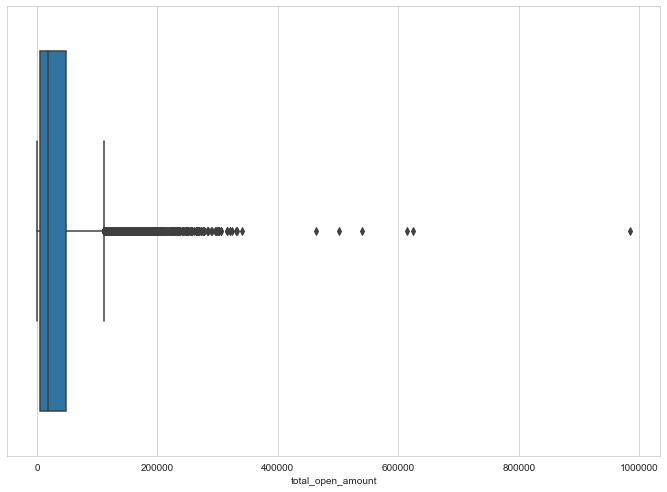

In [44]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.boxplot(ax=ax,x=train_invoiceData["total_open_amount"])

In [45]:
"""
Let's check for any outliers in the total_open_amount column.
"""
Q1 = train_invoiceData["total_open_amount"].quantile(0.25)
Q3 = train_invoiceData["total_open_amount"].quantile(0.75)
Q1 , Q3

(5319.0, 47834.643)

In [46]:
IQR = Q3 - Q1
IQR

42515.643

In [47]:
heightLower=Q1-1.5*IQR
heightUpper=Q3+1.5*IQR

In [48]:
print(train_invoiceData[train_invoiceData["total_open_amount"]>heightUpper].shape)
print(train_invoiceData[train_invoiceData["total_open_amount"]<heightLower].shape)

(2089, 13)
(0, 13)


In [49]:
"""
So, these values have to removed as they are the outliers.
"""
train_invoiceData.drop(train_invoiceData[train_invoiceData["total_open_amount"]>heightUpper].index,inplace=True,axis=0)
train_invoiceData.drop(train_invoiceData[train_invoiceData["total_open_amount"]<heightLower].index,inplace=True,axis=0)

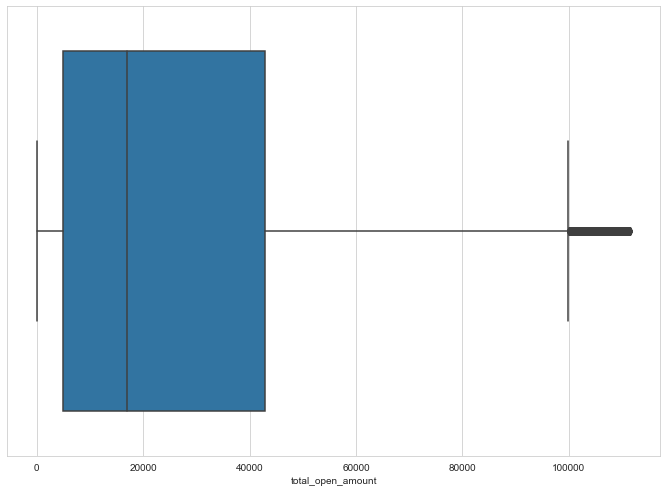

In [50]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.boxplot(ax=ax,x=train_invoiceData["total_open_amount"])
# So via this graph now we can observe that there are no more outliers in the total open ammount.

In [51]:
"""
Let'do a check between 2 dates. As I have observed the data document_create_date.1 and posting_date are kind of same. 
Let's verify.
"""
print((train_invoiceData["document_create_date.1"].equals(train_invoiceData["posting_date"])))
print((test_invoiceData["document_create_date.1"].equals(test_invoiceData["posting_date"])))

True
True


In [52]:
"""
As we can see from above that document_create_date.1 is equal to the posting_date. 
So we have to remove anyone of it to remove the data redundancy. 
As more the common data is, it will not provide more information  to our model so let's drop that column
"""
train_invoiceData.drop("posting_date",axis=1,inplace=True)
test_invoiceData.drop("posting_date",axis=1,inplace=True)

In [53]:
"""
Now, we have to sort the whole train_invoiceData according to the document_create_date.1.
As now we are going to split the data into train,test and val so the document_create_date.1 should be in a sorted manner.
And then we are reseting the index to zero. 
Otherwise it will going to have another column named index to store the value of previous indexes.
Droping the previous indexes and adding the new one.
"""
train_invoiceData.sort_values(by=['document_create_date.1'],inplace=True)
test_invoiceData.sort_values(by=['document_create_date.1'],inplace=True)
test_invoiceData.reset_index(drop=True,inplace=True)
train_invoiceData.reset_index(drop=True,inplace=True)

Split the data into train, test, val in the ratio of 70 percent, 15, percent, 15 percent respectively.<br>
Now, we will have 4 dataframes:<br>
    1) train_invoiceData_train:<br>
        $\;\;\;\;\;\;$This dataframe will consist of train part for our model. Our EDA and Feature creation and Feature extraction will be done on this.<br>
    2) train_invoiceData_test_val:<br>
        $\;\;\;\;\;\;$This dataframe will consist of values that are going to be divided further into test and val based upon the ratio we desire.<br>
    3) train_invoiceData_val:<br>
        $\;\;\;\;\;\;$This dataframe will consist of validation part for our model. Our parameter tuning and accuracy check for diffrent models will be done on this.<br>
    4) train_invoiceData_test<br>
        $\;\;\;\;\;\;$This dataframe will consist of test part for our model. It will tell about how the model is behaving for unknown data and on a particular model selected by val set based on the accuracy it will be checked and tested and that will be the final accuracy/metrics of our model .<br>

In [54]:
"""
Here, we have used a train_test_split function it has many parameters but if used these because of specific reasons:
1) dataframe: the dataframe that you are going to divide into train_invoiceData_train and train_invoiceData_test_val.
             And after that train_invoiceData_test_val will be divided into train_invoiceData_test and train_invoiceData_val
             in further train_test_split()
2) shuffle=False: We have taken shuffle equal to False because we want our rows in sorted order according to the 
                  document_create_date.1 rather than in a random order.
3)test_size: it will say about how much ammount of rows will be in test data.
             Let's say test_size=0.3 it means 30% of the given dataframe is taken as test and rest 70% as train.
4) random_state=0: It's optional in our case to put or not as we have kept shuffle = False so it will start dividing the rows from the beginning in train, test, val. It is used to select a random state from where the division start.
                   If we have done shuffle= True and random_state=None then we will have diffrent accuracies as the model going to have diffrent accuracies for multiple runnings.
"""
train_invoiceData_train,train_invoiceData_test_val=train_test_split(
    train_invoiceData,shuffle=False,test_size=0.3,random_state=0)
train_invoiceData_val, train_invoiceData_test=train_test_split(
    train_invoiceData_test_val,shuffle=False,test_size=0.5,random_state=0)
"""
Calculating the shape of each dataframe that how many rows and columns each contains.
"""
print("Shape of train_invoiceData_train",train_invoiceData_train.shape)
print("Shape of train_invoiceData_test_val",train_invoiceData_test_val.shape)
print("Shape of train_invoiceData_test",train_invoiceData_test.shape)
print("Shape of train_invoiceData_val",train_invoiceData_val.shape)

Shape of train_invoiceData_train (29779, 12)
Shape of train_invoiceData_test_val (12763, 12)
Shape of train_invoiceData_test (6382, 12)
Shape of train_invoiceData_val (6381, 12)


In [55]:
train_invoiceData_train["document_create_date.1"].describe()

count                   29779
unique                    282
top       2019-03-29 00:00:00
freq                      168
first     2018-12-30 00:00:00
last      2019-10-07 00:00:00
Name: document_create_date.1, dtype: object

In [56]:
"""
We are reseting the index to zero. 
Otherwise it will going to have another column named index to store the value of previous indexes.
Droping the previous indexes and adding the new one.
"""

train_invoiceData_test.reset_index(drop=True,inplace=True)
train_invoiceData_train.reset_index(drop=True,inplace=True)
train_invoiceData_test_val.reset_index(drop=True,inplace=True)
train_invoiceData_val.reset_index(drop=True,inplace=True)

In [57]:
print(train_invoiceData_train["buisness_year"].unique())
"""
As we can see that there is only one value in the whole column. 
So we can drop that as it is not providing any significance to our model.
And if we are droping that column in our train_invoiceData_train, 
so we have to remove from train_invoiceData_test and  train_invoiceData_val
"""
train_invoiceData_train.drop("buisness_year",axis=1,inplace=True)
train_invoiceData_val.drop("buisness_year",axis=1,inplace=True)
train_invoiceData_test.drop("buisness_year",axis=1,inplace=True)

[2019]


In [58]:
print(train_invoiceData_train["isOpen"].unique())
"""
As we can see that there is only one value in the whole column i.e. it's a constant column.
So we can drop that as it is not providing any significance to our model.
And if we are droping that column in our train_invoiceData_train, 
so we have to remove from train_invoiceData_test and  train_invoiceData_val
"""
train_invoiceData_train.drop("isOpen",axis=1,inplace=True)
train_invoiceData_val.drop("isOpen",axis=1,inplace=True)
train_invoiceData_test.drop("isOpen",axis=1,inplace=True)

[0]


62.43  percent of customer in the train set haven't paid their dues on time
37.57 percent of customer in the train set have paid their dues before time


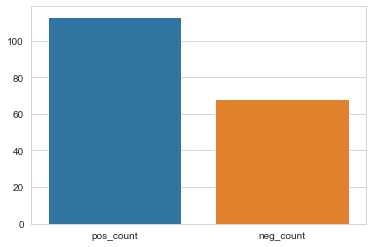

In [59]:
value=train_invoiceData_train['delay'].value_counts().index.tolist()
pos_delay, neg_delay = 0, 0
for num in value: 
    if num >= 0: 
        pos_delay += 1
    else :
        neg_delay += 1
print(round(pos_delay/(pos_delay+neg_delay)*100,2)," percent of customer in the train set haven't paid their dues on time")
print(round(neg_delay/(pos_delay+neg_delay)*100,2),"percent of customer in the train set have paid their dues before time")

sns.set_style(style="whitegrid")
x = ['pos_count','neg_count']
y = [pos_delay, neg_delay]
sns.barplot(x, y)
plt.show()

Here I have used a function named new_feature_creation to create new features for my train_invoiceData_train:<br>
Here I have created multiple features based upon the stats that I have calculated and observed.<br>
I observed that each company has a unique <b>customer name</b> but not a unique customer number. For Example:<br>
The branches of WAL-MART are having same customer number but the names are diffrent so based upon the criteria we can observe
that we can do mapping of the features based upon the customer name rather than customer number.<br>
Let's discuss:<br>
    $\;\;\;\;\;\;$1) <b>num_of_invoices:</b> Total number of the invoices of the invoice owner. It will tell about that how many invoices are there for a particular customer.<br>
    $\;\;\;\;\;\;$2) <b>number_of_delayed_invoices:</b> Total number of the delayed invoices of the invoice owner. It will tell about that how many delayed invoices are there for a particular customer.<br>
    $\;\;\;\;\;\;$3) <b>number_of_early_invoices:</b> Total number of the early invoices of the invoice owner. It will tell about that how many early invoices are there for a particular customer.<br>
    $\;\;\;\;\;\;$4) <b>sum_invoice:</b> Total sum of invoice amount of the invoice owner. It will tell about the sum of the total_open_amount for all the invoices of a particular customer<br>
    $\;\;\;\;\;\;$5) <b>sum_delayed_invoice:</b> Total sum of the delayed invoice amount of the invoice owner. It will tell about the sum of the total_open_amount for the delayed invoices of a particular customer.<br>
    $\;\;\;\;\;\;$6) <b>average_delay_of_delayed:</b> Average delay of the delayed invoices of the invoice owner. Here we are going to find out the average number of delay the customer has done for the having a positive delay.<br>
    $\;\;\;\;\;\;$7) <b>average_delay:</b> Average delay of all the invoices of the invoice owner. Here we are going to find out the average number of delay the customer has done.<br>
    $\;\;\;\;\;\;$8) <b>ratio_num:</b> Ratio between the number_of_delayed_invoices and num_of_invoices. If one has a delay ratio near zero, this customer is a "good" customer that means it pays every bill within the due_date.<br>
    $\;\;\;\;\;\;$9) <b>ratio_sum:</b> Ratio between the sum_delayed_invoice and the sum_invoice.If one has a delay ratio near zero, this customer is a "good" customer that means it pays every bill within the due_date.<br>
This function will return an array of features mapping.

In [60]:
def new_feature_creation(df):
    
    number_of_invoices_mapping = df["name_customer"].value_counts().to_dict()
    # getting a map of having a key as name of that customer and the value is how many times does this customer has appeared.
    
    number_of_delayed_invoices_mapping = df[df["delay"] > 0]["name_customer"].value_counts().to_dict()
    # getting a map of having a key as name of that customer whose delay is greater than zero 
    # and the value is how many times does this customer has appeared for having delay in it's payment.
    
    number_of_early_invoices_mapping = df[df["delay"] < 0]["name_customer"].value_counts().to_dict()
    # getting a map of having a key as name of that customer whose delay is less than zero 
    # and the value is how many times does this customer has appeared for not having delay in it's payment.
    
    sum_invoice_mapping = df.groupby("name_customer")["total_open_amount"].sum().to_dict()
    # getting a map of having a key as name of that customer and the value is the sum of the total_open_amount corresponding to that particular customer
    
    sum_delayed_invoice_mapping = df[df["delay"] > 0].groupby("name_customer")["total_open_amount"].sum().to_dict()
    # getting a map of having a key as name of that customer where the delay is greater than zero and the value is the sum of the total_open_amount corresponding to that particular customer for the delayed part.
    
    avg_delay_of_delayed_mapping = df[df["delay"] > 0].groupby("name_customer")["delay"].mean().to_dict()
    # getting a map of having a key as name of that customer which is having delay greater than zero and the value is the average of the delay of the delays corresponding to that particular customer.
    
    avg_delay_mapping = df.groupby("name_customer")["delay"].mean().to_dict()
    # getting a map of having a key as name of that customer and the value is the average of the delay for all invoices of that customer.
    
    # Adding these columns to the dataframe and mapping the values that we have got above.
    df["num_of_invoices"] = df["name_customer"].map(number_of_invoices_mapping).astype('int64')
    
    df["number_of_delayed_invoices"] = df["name_customer"].map(number_of_delayed_invoices_mapping).fillna(0).astype("int64")
    
    df["number_of_early_invoices"] = df["name_customer"].map(number_of_early_invoices_mapping).fillna(0).astype("int64")

    df["sum_invoice"] = df["name_customer"].map(sum_invoice_mapping).astype("float64")
    
    df["sum_delayed_invoice"] = df["name_customer"].map(sum_delayed_invoice_mapping).fillna(0).astype("float64")
    
    df["average_delay_of_delayed"] = df["name_customer"].map(avg_delay_of_delayed_mapping).fillna(0).astype("float64")
    
    df["average_delay"] = df["name_customer"].map(avg_delay_mapping).astype("float64")
    
    df["ratio_num"] = df["number_of_delayed_invoices"]/df["num_of_invoices"]
    
    df["ratio_sum"] = df["sum_delayed_invoice"] / df["sum_invoice"]
    
    return [number_of_invoices_mapping, number_of_delayed_invoices_mapping, number_of_early_invoices_mapping,
            sum_invoice_mapping, sum_delayed_invoice_mapping,avg_delay_of_delayed_mapping,
            avg_delay_mapping]

In [61]:
"""
Calling the new_feature_creation function by passing train_invoiceData_train as a parameter to add new features to it
and store the returned output in features_mapping
"""
feature_mappings = new_feature_creation(train_invoiceData_train)

In [62]:
"""
Let's verify that the features are added or not.

"""
train_invoiceData_train.head()

,business_code,cust_number,name_customer,clear_date,document_create_date.1,due_in_date,total_open_amount,baseline_create_date,cust_payment_terms,delay,num_of_invoices,number_of_delayed_invoices,number_of_early_invoices,sum_invoice,sum_delayed_invoice,average_delay_of_delayed,average_delay,ratio_num,ratio_sum
0,U001,0100001196,DOLLAR systems,2019-01-14,2018-12-30,2019-01-14,23785.79,2018-12-30,NAA8,0,5,2,0,49708.03,20952.60,1.500000,0.600000,0.400000,0.421513
1,U001,0200769623,WAL-MAR llc,2019-01-09,2018-12-30,2019-01-14,20076.44,2018-12-30,NAH4,-5,713,148,555,15137048.53,2244062.97,3.385135,-2.321178,0.207574,0.148250
2,U001,0200726979,BJ'S llc,2019-01-15,2018-12-30,2019-01-14,240.86,2018-12-30,NAA8,1,99,41,0,462707.82,342005.69,2.000000,0.828283,0.414141,0.739140
3,U001,0200769623,WAL-MAR trust,2019-01-09,2018-12-30,2019-01-14,985.41,2018-12-30,NAH4,-5,678,126,545,14525380.43,2184197.59,5.626984,-2.109145,0.185841,0.150371
4,U001,0200743123,KROGER foundation,2019-01-14,2018-12-30,2019-01-14,50228.95,2018-12-30,NAA8,0,48,22,0,2194148.91,1052721.37,2.318182,1.062500,0.458333,0.479786


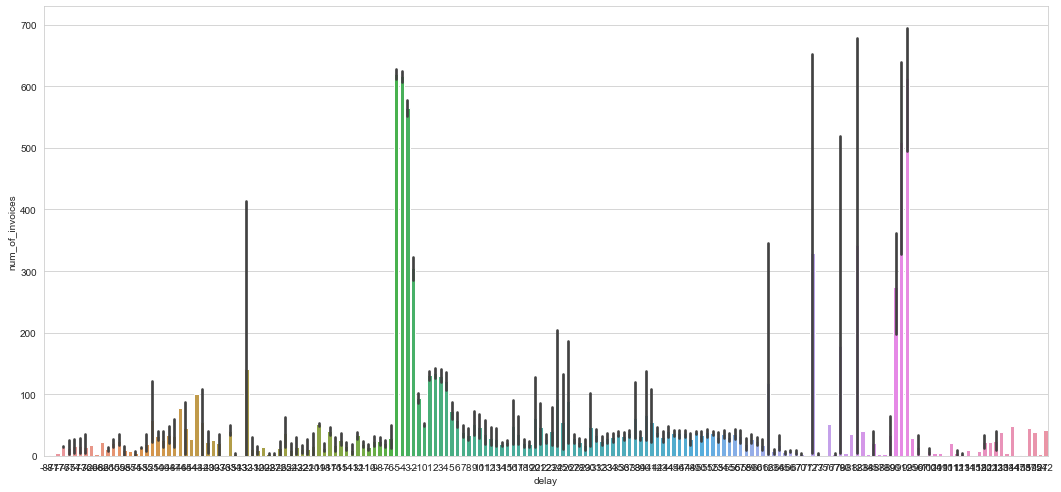

In [63]:
a4_dims = (18, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.barplot(ax=ax,x=train_invoiceData_train["delay"],y=train_invoiceData_train["num_of_invoices"])

It's a plot between delay and num_of_invoices. Here we can see that there are only quite few peeks that have so much high value
As the delay is increasing, we can see that when delay at it's max extreme there are not so much invoices with this much of rise and peak.But in between ranges from 10 to 40 there are more no of invoices.

Text(0, 0.5, 'Delay_Count')

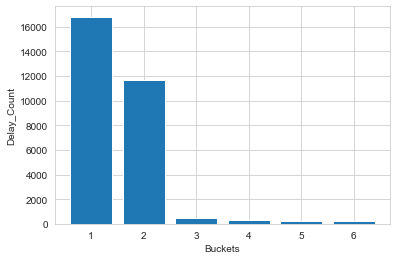

In [64]:
"""
A function named bucket which will return the corresponding bucket number.
"""
def bucket(x):
    if x <= 0:
        return 1
    elif ( x > 0 and x <= 15):
        return 2
    elif ( x > 15 and x <= 30):
        return 3
    elif ( x > 30 and x <= 45):
        return 4
    elif ( x > 45 and x <= 60):
        return 5
    elif ( x > 60 ):
        return 6
predicted_bucket=train_invoiceData_train["delay"].apply(bucket)
value_mapping=predicted_bucket.value_counts().to_dict()
keys = value_mapping.keys()
values = value_mapping. values()
plt. bar(keys, values)
plt.xlabel("Buckets")
plt.ylabel("Delay_Count")

By this we can infer that the most of the train_invoiceData_train consists of the bucket 1. So and 2nd it's bucket 2 which may show a light to out our model that if our train has so much of bucket 1 and bucket 2 then our test may also have the similar characterstics.

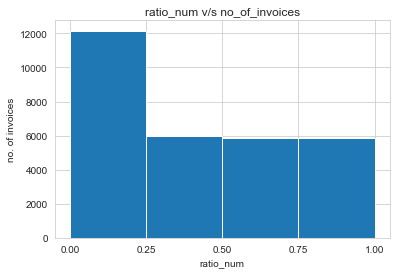

In [65]:
fig,ax = plt.subplots(1,1)
a = train_invoiceData_train["ratio_num"]
ax.hist(a, bins = [0,0.25,0.50,0.75,1])
ax.set_xticks([0,0.25,0.50,0.75,1])
ax.set_title("ratio_num v/s no_of_invoices")
ax.set_xlabel('ratio_num')
ax.set_ylabel('no. of invoices')
plt.show()

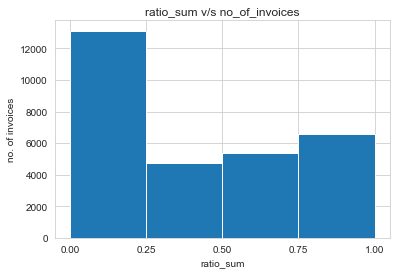

In [66]:
fig,ax = plt.subplots(1,1)
a = train_invoiceData_train["ratio_sum"]
ax.hist(a, bins = [0,0.25,0.50,0.75,1])
ax.set_xticks([0,0.25,0.50,0.75,1])
ax.set_title("ratio_sum v/s no_of_invoices")
ax.set_xlabel('ratio_sum')
ax.set_ylabel('no. of invoices')
plt.show()

By observing both the graphs this we can infer that if the ratios are near to 0 the no. of invoices having the delay is less which proves the above point that as the ratio will decrease it will be a good customer and pays the due well before time or a very less delay.

Now we are going to encode our features that have categorical values or in simple words the one that has data type objects.<br>
So as we can see there are 4 columns with us having categorical values.<br>
We can encode these columns via diffrent methods like label encoding, mean encoding, target encoding, one-hot encoding etc.<br>
So, I have encoded the cust_number, name_customer, business_code, cust_payment_terms via label encoding.

In [67]:
label_encoder_num = preprocessing.LabelEncoder()# an object of LabelEncoder is created named label_encoder_num
label_encoder_num.fit(train_invoiceData_train['cust_number'])
label_encoder_num_mapping = dict(zip(label_encoder_num.classes_, label_encoder_num.transform(label_encoder_num.classes_)))
'''
Here, we have formed a dictionary where a unique code will be given to each unique class and the mapping will be
stored in a dictionary for doing furthur more mapping in test and val data.
'''
train_invoiceData_train['cust_number']= label_encoder_num.fit_transform(train_invoiceData_train['cust_number'])

In [68]:
label_encoder_name= preprocessing.LabelEncoder()# an object of LabelEncoder is created named label_encoder_name
label_encoder_name.fit(train_invoiceData_train['name_customer'])
label_encoder_name_mapping = dict(zip(label_encoder_name.classes_, label_encoder_name.transform(label_encoder_name.classes_)))
'''
Here, we have formed a dictionary where a unique code will be given to each unique class and the mapping will be
stored in a dictionary for doing furthur more mapping in test and val data.
'''
train_invoiceData_train['name_customer']= label_encoder_name.fit_transform(train_invoiceData_train['name_customer'])

In [69]:
label_encoder_business_code= preprocessing.LabelEncoder()# an object of LabelEncoder is created named label_encoder_business_code
label_encoder_business_code.fit(train_invoiceData_train['business_code'])
label_encoder_business_code_mapping = dict(zip(label_encoder_business_code.classes_, label_encoder_business_code.transform(label_encoder_business_code.classes_)))
'''
Here, we have formed a dictionary where a unique code will be given to each unique class and the mapping will be
stored in a dictionary for doing furthur more mapping in test and val data.
'''
train_invoiceData_train['business_code']= label_encoder_business_code.fit_transform(train_invoiceData_train['business_code'])

In [70]:
label_encoder_cust_pay_terms = preprocessing.LabelEncoder()# an object of LabelEncoder is created named label_encoder_cust_pay_terms
label_encoder_cust_pay_terms.fit(train_invoiceData_train['cust_payment_terms'])
label_encoder_cust_pay_terms_mapping = dict(zip(label_encoder_cust_pay_terms.classes_, label_encoder_cust_pay_terms.transform(label_encoder_cust_pay_terms.classes_)))
'''
Here, we have formed a dictionary where a unique code will be given to each unique class and the mapping will be
stored in a dictionary for doing furthur more mapping in test and val data.
'''
train_invoiceData_train['cust_payment_terms']= label_encoder_cust_pay_terms.fit_transform(train_invoiceData_train['cust_payment_terms'])

In [71]:
train_invoiceData_test["num_of_invoices"] = train_invoiceData_test["name_customer"].map(
    feature_mappings[0]).fillna(sum(feature_mappings[0].values())/len(feature_mappings[0].values())).astype('int64')

train_invoiceData_test["number_of_delayed_invoices"] = train_invoiceData_test["name_customer"].map(
    feature_mappings[1]).fillna(sum(feature_mappings[1].values())/len(feature_mappings[1].values())).astype('int64')

train_invoiceData_test["number_of_early_invoices"] = train_invoiceData_test["name_customer"].map(
    feature_mappings[2]).fillna(sum(feature_mappings[2].values())/len(feature_mappings[2].values())).astype('int64')

train_invoiceData_test["sum_invoice"] = train_invoiceData_test["name_customer"].map(
    feature_mappings[3]).fillna(sum(feature_mappings[3].values())/len(feature_mappings[3].values())).astype('int64')

train_invoiceData_test["sum_delayed_invoice"] = train_invoiceData_test["name_customer"].map(
    feature_mappings[4]).fillna(sum(feature_mappings[4].values())/len(feature_mappings[4].values())).astype('int64')

train_invoiceData_test["average_delay_of_delayed"] = train_invoiceData_test["name_customer"].map(
    feature_mappings[5]).fillna(sum(feature_mappings[5].values())/len(feature_mappings[5].values())).astype('int64')

train_invoiceData_test["average_delay"] = train_invoiceData_test["name_customer"].map(
    feature_mappings[6]).fillna(sum(feature_mappings[6].values())/len(feature_mappings[6].values())).astype('int64')

train_invoiceData_test["ratio_num"] = train_invoiceData_test["number_of_delayed_invoices"]/train_invoiceData_test["num_of_invoices"]

train_invoiceData_test["ratio_sum"] = train_invoiceData_test["sum_delayed_invoice"] / train_invoiceData_test["sum_invoice"]

"""
Here I'm Encoding the train_invoiceData_test with the mapping that I have created in train_invoiceData_train 
so that the encoding value remain constant throughout train and test.
For filling the others values that are not present in the mapping of train,
fill them with the last index + 1 i.e. the length of the dictionary. 
""" 
train_invoiceData_test["cust_number"] = train_invoiceData_test["cust_number"].map(
    label_encoder_num_mapping).fillna(len(label_encoder_num_mapping)).astype('int64')

train_invoiceData_test["business_code"] = train_invoiceData_test["business_code"].map(
    label_encoder_business_code_mapping).fillna(len(label_encoder_business_code_mapping)).astype('int64')

train_invoiceData_test["name_customer"] = train_invoiceData_test["name_customer"].map(
    label_encoder_name_mapping).fillna(len(label_encoder_name_mapping)).astype('int64')

train_invoiceData_test["cust_payment_terms"] = train_invoiceData_test["cust_payment_terms"].map(
    label_encoder_cust_pay_terms_mapping).fillna(len(label_encoder_cust_pay_terms_mapping)).astype('int64')

In [72]:
train_invoiceData_val["num_of_invoices"] = train_invoiceData_val["name_customer"].map(
    feature_mappings[0]).fillna(sum(feature_mappings[0].values())/len(feature_mappings[0].values())).astype('int64')

train_invoiceData_val["number_of_delayed_invoices"] = train_invoiceData_val["name_customer"].map(
    feature_mappings[1]).fillna(sum(feature_mappings[1].values())/len(feature_mappings[1].values())).astype('int64')

train_invoiceData_val["number_of_early_invoices"] = train_invoiceData_val["name_customer"].map(
    feature_mappings[2]).fillna(sum(feature_mappings[2].values())/len(feature_mappings[2].values())).astype('int64')

train_invoiceData_val["sum_invoice"] = train_invoiceData_val["name_customer"].map(
    feature_mappings[3]).fillna(sum(feature_mappings[3].values())/len(feature_mappings[3].values())).astype('int64')

train_invoiceData_val["sum_delayed_invoice"] = train_invoiceData_val["name_customer"].map(
    feature_mappings[4]).fillna(sum(feature_mappings[4].values())/len(feature_mappings[4].values())).astype('int64')

train_invoiceData_val["average_delay_of_delayed"] = train_invoiceData_val["name_customer"].map(
    feature_mappings[5]).fillna(sum(feature_mappings[5].values())/len(feature_mappings[5].values())).astype('int64')

train_invoiceData_val["average_delay"] = train_invoiceData_val["name_customer"].map(
    feature_mappings[6]).fillna(sum(feature_mappings[6].values())/len(feature_mappings[6].values())).astype('int64')

train_invoiceData_val["ratio_num"] = train_invoiceData_val["number_of_delayed_invoices"]/train_invoiceData_val["num_of_invoices"]

train_invoiceData_val["ratio_sum"] = train_invoiceData_val["sum_delayed_invoice"] / train_invoiceData_val["sum_invoice"]



"""
Here I'm Encoding the train_invoiceData_test with the mapping that I have created in train_invoiceData_train 
so that the encoding value remain constant throughout train and test.
For filling the others values that are not present in the mapping of train,
fill them with the last index + 1 i.e. the length of the dictionary. 
"""
train_invoiceData_val["cust_number"] = train_invoiceData_val["cust_number"].map(
    label_encoder_num_mapping).fillna(len(label_encoder_num_mapping)).astype('int64')

train_invoiceData_val["business_code"] = train_invoiceData_val["business_code"].map(
    label_encoder_business_code_mapping).fillna(len(label_encoder_business_code_mapping)).astype('int64')

train_invoiceData_val["name_customer"] = train_invoiceData_val["name_customer"].map(
    label_encoder_name_mapping).fillna(len(label_encoder_name_mapping)).astype('int64')

train_invoiceData_val["cust_payment_terms"] = train_invoiceData_val["cust_payment_terms"].map(
    label_encoder_cust_pay_terms_mapping).fillna(len(label_encoder_cust_pay_terms_mapping)).astype('int64')

In [73]:
# Let's verify that all features that we have thought have been added or not.
train_invoiceData_train.head()

,business_code,cust_number,name_customer,clear_date,document_create_date.1,due_in_date,total_open_amount,baseline_create_date,cust_payment_terms,delay,num_of_invoices,number_of_delayed_invoices,number_of_early_invoices,sum_invoice,sum_delayed_invoice,average_delay_of_delayed,average_delay,ratio_num,ratio_sum
0,1,10,939,2019-01-14,2018-12-30,2019-01-14,23785.79,2018-12-30,19,0,5,2,0,49708.03,20952.60,1.500000,0.600000,0.400000,0.421513
1,1,772,3487,2019-01-09,2018-12-30,2019-01-14,20076.44,2018-12-30,32,-5,713,148,555,15137048.53,2244062.97,3.385135,-2.321178,0.207574,0.148250
2,1,677,378,2019-01-15,2018-12-30,2019-01-14,240.86,2018-12-30,19,1,99,41,0,462707.82,342005.69,2.000000,0.828283,0.414141,0.739140
3,1,772,3489,2019-01-09,2018-12-30,2019-01-14,985.41,2018-12-30,32,-5,678,126,545,14525380.43,2184197.59,5.626984,-2.109145,0.185841,0.150371
4,1,714,1864,2019-01-14,2018-12-30,2019-01-14,50228.95,2018-12-30,19,0,48,22,0,2194148.91,1052721.37,2.318182,1.062500,0.458333,0.479786


In [74]:
# Let's verify that all features that we have thought have been added or not.
train_invoiceData_test.head()

,business_code,cust_number,name_customer,clear_date,document_create_date.1,due_in_date,total_open_amount,baseline_create_date,cust_payment_terms,delay,num_of_invoices,number_of_delayed_invoices,number_of_early_invoices,sum_invoice,sum_delayed_invoice,average_delay_of_delayed,average_delay,ratio_num,ratio_sum
0,1,772,3487,2019-12-23,2019-12-10,2019-12-25,1126.17,2019-12-10,32,-2,713,148,555,15137048,2244062,3,-2,0.207574,0.148250
1,1,772,3490,2019-12-20,2019-12-10,2019-12-25,52817.07,2019-12-10,32,-5,685,132,543,15150739,1967441,5,-2,0.192701,0.129858
2,1,772,3480,2019-12-27,2019-12-10,2019-12-25,46199.57,2019-12-10,32,2,680,134,539,14337658,2451453,5,-1,0.197059,0.170980
3,1,118,851,2019-12-31,2019-12-10,2019-12-25,6010.86,2019-12-10,19,6,25,15,5,856644,462452,1,0,0.600000,0.539842
4,1,614,3345,2019-12-26,2019-12-10,2019-12-25,6658.47,2019-12-10,19,1,6,3,1,52098,28062,4,1,0.500000,0.538639


In [75]:
# Let's verify that all features that we have thought have been added or not.
train_invoiceData_val.head()

,business_code,cust_number,name_customer,clear_date,document_create_date.1,due_in_date,total_open_amount,baseline_create_date,cust_payment_terms,delay,num_of_invoices,number_of_delayed_invoices,number_of_early_invoices,sum_invoice,sum_delayed_invoice,average_delay_of_delayed,average_delay,ratio_num,ratio_sum
0,1,677,378,2019-10-22,2019-10-07,2019-10-22,893.52,2019-10-07,19,0,99,41,6,462707,342005,2,0,0.414141,0.739139
1,1,844,729,2019-10-21,2019-10-07,2019-10-22,38103.59,2019-10-07,21,-1,69,18,35,1715950,414147,7,0,0.260870,0.241351
2,1,481,3136,2019-10-23,2019-10-07,2019-10-22,407.30,2019-10-07,19,1,22,20,1,354369,348413,4,3,0.909091,0.983193
3,1,707,1997,2019-10-23,2019-10-07,2019-10-22,18667.82,2019-10-07,19,1,7,7,6,113902,113902,3,3,1.000000,1.000000
4,1,760,3164,2019-11-12,2019-10-07,2019-11-08,45362.84,2019-10-07,12,4,21,14,6,425998,183709,3,1,0.666667,0.431244


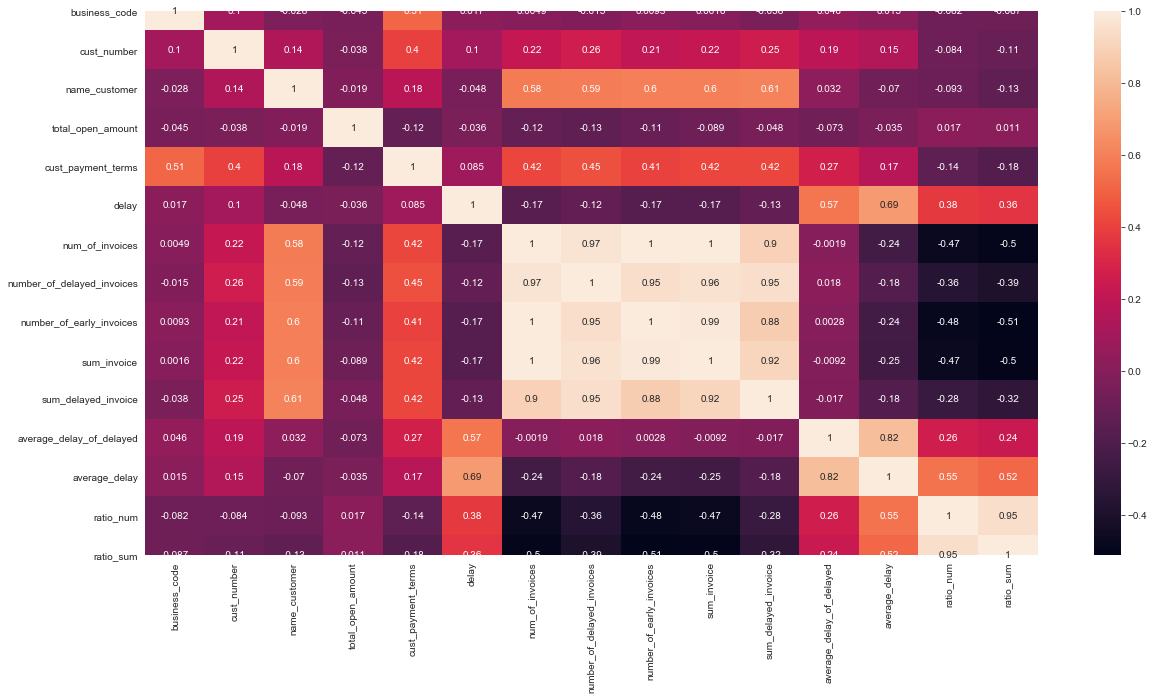

In [76]:
"""
Now let's visualise the correlation between the variables and with the delay.
If correlation between the delay and other columns are high include those in your features.
By seeing the heat map we can say that "average_delay","ratio_sum","ratio_num","average_delay_of_delayed" should be considered as features.
While rest we can take help of feature selection algorithms like Wrapper methods which may include FFS,BFS etc or Embedded Methods.
"""
corr=train_invoiceData_train.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr,annot=True)

In [77]:
"""
For the sake of feature selection via FFS, BFS and tree_based_feature_importance
Just creating the X_train and y_train
"""
X_train=train_invoiceData_train[
        ["business_code",
        "cust_number",
        "name_customer",
        "total_open_amount",
        "cust_payment_terms",
        "num_of_invoices",
        "number_of_delayed_invoices",
        "number_of_early_invoices",
        "sum_invoice",
        "sum_delayed_invoice",
        "average_delay_of_delayed",
        "average_delay",
        "ratio_num",
        "ratio_sum"]
    ]
y_train=train_invoiceData_train["delay"]

In [78]:
def tree_based_feature_importance(X_train,y_train):
    from sklearn.ensemble import RandomForestRegressor
    # create the random forest model
    model = RandomForestRegressor(n_estimators=120)

    # fit the model to start training.
    model.fit(X_train, y_train)

    # get the importance of the resulting features.
    importances = model.feature_importances_

    # create a data frame for visualization.
    final_df = pd.DataFrame({"Features": X_train.columns, "Importances":importances})
    final_df.set_index('Importances')

    # sort in descending order 
    final_df = final_df.sort_values('Importances',ascending=False)
    
    #visualising feature importance
    pd.Series(model.feature_importances_, index=X_train.columns).nlargest(6).plot(kind='barh')  
    return final_df

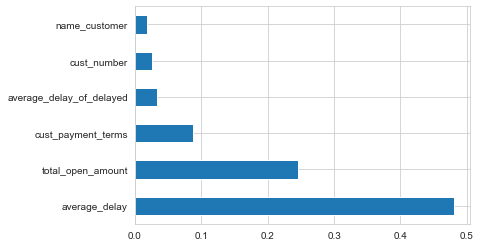

In [79]:
feature_importance=tree_based_feature_importance(X_train,y_train)#features importance data frame

In [80]:
display(feature_importance)

,Features,Importances
11,average_delay,0.480382
3,total_open_amount,0.245888
4,cust_payment_terms,0.086726
10,average_delay_of_delayed,0.032724
1,cust_number,0.024966
2,name_customer,0.017831
8,sum_invoice,0.017697
5,num_of_invoices,0.017618
13,ratio_sum,0.015981
12,ratio_num,0.015797


In [81]:
def FFS(X,y):
    from mlxtend.feature_selection import SequentialFeatureSelector as SFS
    from sklearn.linear_model import LinearRegression
    # Sequential Forward Selection(sfs)
    sfs = SFS(LinearRegression(), k_features=8, forward=True, scoring = 'r2', cv = 5)
    sfs.fit(X, y)#doing the FFS
    return sfs.k_feature_names_

In [82]:
FFS(X_train,y_train)#features selected by FFS

('business_code',
 'cust_number',
 'name_customer',
 'total_open_amount',
 'cust_payment_terms',
 'number_of_delayed_invoices',
 'sum_delayed_invoice',
 'average_delay')

In [83]:
def BFS(X,y):
    from mlxtend.feature_selection import SequentialFeatureSelector as SFS
    from sklearn.linear_model import LinearRegression
    # Sequential Backward Selection(sfs)
    sfs = SFS(LinearRegression(), k_features=8, forward=False, scoring = 'r2', cv = 5)
    sfs.fit(X, y)#doing the BFS
    return sfs.k_feature_names_

In [84]:
BFS(X_train,y_train)#features selected by Backward Feature Selection

('business_code',
 'total_open_amount',
 'cust_payment_terms',
 'num_of_invoices',
 'number_of_delayed_invoices',
 'number_of_early_invoices',
 'average_delay',
 'ratio_sum')

In [85]:
"""
A list of selected features on which the model is going to be trained, validate and tested.
"""
# selected_features = ['name_customer',
#                      'total_open_amount',
#                      'cust_payment_terms',
#                      'number_of_delayed_invoices',
#                      'sum_delayed_invoice',
#                      'average_delay']


selected_features = ['name_customer',
                      "average_delay",
                      "ratio_sum",
                      "ratio_num",
                      "average_delay_of_delayed"]

# selected_features = ['business_code',
#                      'cust_number',
#                      'name_customer',
#                      'total_open_amount',
#                      'cust_payment_terms',
#                      'number_of_delayed_invoices',
#                      'sum_delayed_invoice',
#                      'average_delay']

In [86]:
# initialising X_train which will consist of only those features which we have selected in the selected_features list.
# y_train is also initialised and will consist of only target variable that is delay
X_train=train_invoiceData_train[selected_features]
y_train=train_invoiceData_train["delay"]

In [87]:
# calculating the dimensions of the X_train and y_train
X_train.shape,y_train.shape

((29779, 5), (29779,))

In [88]:
# initialising X_test which will consist of only those features which we have selected in the selected_features list.
# y_test is also initialised and will consist of only target variable that is delay
X_test=train_invoiceData_test[selected_features]
y_test=train_invoiceData_test["delay"]

In [89]:
# calculating the dimensions of the X_test and y_test
X_test.shape,y_test.shape

((6382, 5), (6382,))

In [90]:
# initialising X_val which will consist of only those features which we have selected in the selected_features list.
# y_val is also initialised and will consist of only target variable that is delay
X_val=train_invoiceData_val[selected_features]
y_val=train_invoiceData_val["delay"]

In [91]:
# calculating the dimensions of the X_val and y_val
X_val.shape,y_val.shape

((6381, 5), (6381,))

In [92]:
# Defining Lists to Store in the Results and Names of Algorithms
MSE_Score = []
# R2_Score = []
Algorithm = []
Root_Mean_Squared_Error=[]

In [93]:
# Fitting Simple Linear Regression to the Training Set
Algorithm.append('Linear Regression')
clf = LinearRegression()
clf.fit(X_train, y_train)

# Predicting the Test Set Results
predicted = clf.predict(X_val)

# Appending the Scores For Visualisation at a Later Part
MSE_Score.append(mean_squared_error(y_val, predicted))
# R2_Score.append(r2_score(y_val, predicted))
Root_Mean_Squared_Error.append(sqrt(mean_squared_error(y_val, predicted)))

In [94]:
# Fitting SVR to the Training Set
Algorithm.append('Support Vector Regression')
clf = SVR()
clf.fit(X_train, y_train)

# Predicting the Test Set Results
predicted = clf.predict(X_val)


# Appending the Scores For Visualisation at a Later Part
MSE_Score.append(mean_squared_error(y_val, predicted))
# R2_Score.append(r2_score(y_val, predicted))
Root_Mean_Squared_Error.append(sqrt(mean_squared_error(y_val, predicted)))

In [95]:
# Fitting Decision Tree to the Training Set
Algorithm.append('Decision Tree Regressor')
clf = DecisionTreeRegressor()
clf.fit(X_train, y_train)

# Predicting the Test Set Results
predicted = clf.predict(X_val)

# Appending the Scores For Visualisation at a Later Part
MSE_Score.append(mean_squared_error(y_val, predicted))
# R2_Score.append(r2_score(y_val, predicted))
Root_Mean_Squared_Error.append(sqrt(mean_squared_error(y_val, predicted)))

In [96]:
# Fitting Random Forest Regressor Tree to the Training Set
Algorithm.append('Random Forest Regressor')
clf = RandomForestRegressor()
clf.fit(X_train, y_train)

# Predicting the Test Set Results
predicted = clf.predict(X_val)

# Appending the Scores For Visualisation at a Later Part
MSE_Score.append(mean_squared_error(y_val, predicted))
# R2_Score.append(r2_score(y_val, predicted))
Root_Mean_Squared_Error.append(sqrt(mean_squared_error(y_val, predicted)))

In [97]:
# Fitting XGBoost Regressor to the Training Set
Algorithm.append('XGB Regressor')
clf = xgb.XGBRegressor()
clf.fit(X_train, y_train)

# Predicting the Test Set Results
predicted = clf.predict(X_val)

# Appending the Scores For Visualisation at a Later Part
MSE_Score.append(mean_squared_error(y_val, predicted))
# R2_Score.append(r2_score(y_val, predicted))
Root_Mean_Squared_Error.append(sqrt(mean_squared_error(y_val, predicted)))

In [98]:
# Just Combining the Lists into a DataFrame for a Better Visualisation
Comparison = pd.DataFrame(list(zip(Algorithm, MSE_Score, Root_Mean_Squared_Error)),
                          columns = ['Algorithm', 'MSE_Score','Root_Mean_Squared_Error'])
Comparison

,Algorithm,MSE_Score,Root_Mean_Squared_Error
0,Linear Regression,43.693778,6.610127
1,Support Vector Regression,48.228812,6.944697
2,Decision Tree Regressor,43.741831,6.613761
3,Random Forest Regressor,44.276529,6.654061
4,XGB Regressor,43.701339,6.610699


So by this XGB Regressor showing the better R2 Score compared to the other models so we will apply our train_invoiceData_test to this feature.

In [99]:
clf = xgb.XGBRegressor()
clf.fit(X_train, y_train)
predicted = clf.predict(X_test)
print("Mean Square Error: ",mean_squared_error(y_test, predicted))
# print("R2 Score: ",r2_score(y_test, predicted))
print("Root mean square Error: ",sqrt(mean_squared_error(y_test, predicted)))

Mean Square Error:  67.91052402530275
Root mean square Error:  8.2407841875214


In [100]:
"""
Now, we are all set to calculate the clear_date and the bucket it to which belong.

"""
test_invoiceData.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,document_create_date.1,due_in_date,total_open_amount,baseline_create_date,cust_payment_terms,isOpen
0,U001,0200881076,ALBERT,NaT,2020,2020-02-27,2020-03-13,17391.23,2020-02-27,NAA8,1
1,U001,0200148860,DOLLA,NaT,2020,2020-02-27,2020-03-13,14704.10,2020-02-27,NAA8,1
2,U001,0200705742,DOT systems,NaT,2020,2020-02-27,2020-03-30,75324.29,2020-02-27,NA32,1
3,U001,0200780825,SYSCO FO,NaT,2020,2020-02-27,2020-03-13,3418.18,2020-02-27,NAA8,1
4,U001,0200764795,SYSCO in,NaT,2020,2020-02-27,2020-03-13,41939.99,2020-02-27,NAA8,1


In [101]:
test_invoiceData["num_of_invoices"] = test_invoiceData["name_customer"].map(
    feature_mappings[0]).fillna(sum(feature_mappings[0].values())/len(feature_mappings[0].values())).astype('int64')

test_invoiceData["number_of_delayed_invoices"] = test_invoiceData["name_customer"].map(
    feature_mappings[1]).fillna(sum(feature_mappings[1].values())/len(feature_mappings[1].values())).astype('int64')

test_invoiceData["number_of_early_invoices"] = test_invoiceData["name_customer"].map(
    feature_mappings[2]).fillna(sum(feature_mappings[2].values())/len(feature_mappings[2].values())).astype('int64')

test_invoiceData["sum_invoice"] = test_invoiceData["name_customer"].map(
    feature_mappings[3]).fillna(sum(feature_mappings[3].values())/len(feature_mappings[3].values())).astype('int64')

test_invoiceData["sum_delayed_invoice"] = test_invoiceData["name_customer"].map(
    feature_mappings[4]).fillna(sum(feature_mappings[4].values())/len(feature_mappings[4].values())).astype('int64')

test_invoiceData["average_delay_of_delayed"] = test_invoiceData["name_customer"].map(
    feature_mappings[5]).fillna(sum(feature_mappings[5].values())/len(feature_mappings[5].values())).astype('int64')

test_invoiceData["average_delay"] = test_invoiceData["name_customer"].map(
    feature_mappings[6]).fillna(sum(feature_mappings[6].values())/len(feature_mappings[6].values())).astype('int64')

test_invoiceData["ratio_num"] = test_invoiceData["number_of_delayed_invoices"]/test_invoiceData["num_of_invoices"]

test_invoiceData["ratio_sum"] = test_invoiceData["sum_delayed_invoice"] / test_invoiceData["sum_invoice"]



"""
Here I'm Encoding the test_invoiceData with the mapping that I have created in train_invoiceData_train 
so that the encoding value remain constant throughout train and test.
For filling the others values that are not present in the mapping of train,
fill them with the last index + 1 i.e. the length of the dictionary. 
""" 

test_invoiceData["cust_number"] = test_invoiceData["cust_number"].map(
    label_encoder_num_mapping).fillna(len(label_encoder_num_mapping)).astype('int64')

test_invoiceData["business_code"] = test_invoiceData["business_code"].map(
    label_encoder_business_code_mapping).fillna(len(label_encoder_business_code_mapping)).astype('int64')

test_invoiceData["name_customer"] = test_invoiceData["name_customer"].map(
    label_encoder_name_mapping).fillna(len(label_encoder_name_mapping)).astype('int64')

test_invoiceData["cust_payment_terms"] = test_invoiceData["cust_payment_terms"].map(
    label_encoder_cust_pay_terms_mapping).fillna(len(label_encoder_cust_pay_terms_mapping)).astype('int64')

In [102]:
test_invoiceData.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,document_create_date.1,due_in_date,total_open_amount,baseline_create_date,cust_payment_terms,isOpen,num_of_invoices,number_of_delayed_invoices,number_of_early_invoices,sum_invoice,sum_delayed_invoice,average_delay_of_delayed,average_delay,ratio_num,ratio_sum
0,1,884,85,NaT,2020,2020-02-27,2020-03-13,17391.23,2020-02-27,19,1,16,1,1,648127,54028,1,0,0.062500,0.083360
1,1,435,920,NaT,2020,2020-02-27,2020-03-13,14704.10,2020-02-27,19,1,24,5,3,982486,122492,1,0,0.208333,0.124676
2,1,632,960,NaT,2020,2020-02-27,2020-03-30,75324.29,2020-02-27,12,1,56,4,34,1602549,144224,2,-7,0.071429,0.089997
3,1,800,3165,NaT,2020,2020-02-27,2020-03-13,3418.18,2020-02-27,19,1,8,8,6,129191,129191,2,2,1.000000,1.000000
4,1,762,3149,NaT,2020,2020-02-27,2020-03-13,41939.99,2020-02-27,19,1,50,38,5,941934,757284,2,1,0.760000,0.803967


In [103]:
"""
Initialising X_test which will consist of only those features which we have selected in the selected_features list and
going to predict on the basis of those only.
"""
X_test=test_invoiceData[selected_features]

In [104]:
XGB_predict = clf.predict(X_test) #Predictions on Testing data
print(XGB_predict)

[ 3.6140415e-04  3.1986858e-03 -7.0345383e+00 ...  2.0001767e+00
  1.0018240e+00  3.9972677e+00]


In [105]:
"""
Assigning a new column name predicted_delay which stores the output of the XGB_predict that 
will be the delay predicted by the XGBBooster.
"""
test_invoiceData["predicted_delay"]=XGB_predict

In [106]:
# converting the predicting delay to integer by applying ceiling function.
test_invoiceData["predicted_delay"]=test_invoiceData["predicted_delay"].apply(np.ceil).astype("int64")

In [107]:
# Let's verify the changes that happened or not.
test_invoiceData.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,document_create_date.1,due_in_date,total_open_amount,baseline_create_date,cust_payment_terms,...,num_of_invoices,number_of_delayed_invoices,number_of_early_invoices,sum_invoice,sum_delayed_invoice,average_delay_of_delayed,average_delay,ratio_num,ratio_sum,predicted_delay
0,1,884,85,NaT,2020,2020-02-27,2020-03-13,17391.23,2020-02-27,19,...,16,1,1,648127,54028,1,0,0.062500,0.083360,1
1,1,435,920,NaT,2020,2020-02-27,2020-03-13,14704.10,2020-02-27,19,...,24,5,3,982486,122492,1,0,0.208333,0.124676,1
2,1,632,960,NaT,2020,2020-02-27,2020-03-30,75324.29,2020-02-27,12,...,56,4,34,1602549,144224,2,-7,0.071429,0.089997,-7
3,1,800,3165,NaT,2020,2020-02-27,2020-03-13,3418.18,2020-02-27,19,...,8,8,6,129191,129191,2,2,1.000000,1.000000,3
4,1,762,3149,NaT,2020,2020-02-27,2020-03-13,41939.99,2020-02-27,19,...,50,38,5,941934,757284,2,1,0.760000,0.803967,1


In [108]:
#Convert the second column type to pandas timedelta type and add to first column (which is already in date time type)
test_invoiceData['clear_date'] = test_invoiceData['due_in_date']+pd.to_timedelta(test_invoiceData['predicted_delay'],unit='d') 

In [109]:
"""
Let's verify that clear_date column is filled with the sum of predicted_delay and due_in_date
And by this the 1st task that is to compute the clear date is completed.
Further we have to go ahead to do bucketisation that is depending upon the number of predicted delays 
compute to which bucket that particular invoice belongs.
"""
test_invoiceData.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,document_create_date.1,due_in_date,total_open_amount,baseline_create_date,cust_payment_terms,...,num_of_invoices,number_of_delayed_invoices,number_of_early_invoices,sum_invoice,sum_delayed_invoice,average_delay_of_delayed,average_delay,ratio_num,ratio_sum,predicted_delay
0,1,884,85,2020-03-14,2020,2020-02-27,2020-03-13,17391.23,2020-02-27,19,...,16,1,1,648127,54028,1,0,0.062500,0.083360,1
1,1,435,920,2020-03-14,2020,2020-02-27,2020-03-13,14704.10,2020-02-27,19,...,24,5,3,982486,122492,1,0,0.208333,0.124676,1
2,1,632,960,2020-03-23,2020,2020-02-27,2020-03-30,75324.29,2020-02-27,12,...,56,4,34,1602549,144224,2,-7,0.071429,0.089997,-7
3,1,800,3165,2020-03-16,2020,2020-02-27,2020-03-13,3418.18,2020-02-27,19,...,8,8,6,129191,129191,2,2,1.000000,1.000000,3
4,1,762,3149,2020-03-14,2020,2020-02-27,2020-03-13,41939.99,2020-02-27,19,...,50,38,5,941934,757284,2,1,0.760000,0.803967,1


Let's assign Buckets:<br>
if value <i>less than or equal to zero</i> then <b>Bucket 1</b>.<br>
if value <i>greater than zero and less than and equals to fifteen</i> then it's <b>Bucket 2</b>.<br>
if value <i>greater than fifteen and less than and equals to thirty</i> then it's <b>Bucket 3</b>.<br>
if value <i>greater than thirty and less than and equals to forty-five</i> then it's <b>Bucket 4</b>.<br>
if value <i>greater than forty-five and less than and equals to sixty</i> then it's <b>Bucket 5</b>.<br>
if value <i>greater than sixty</i> then it's <b>Bucket 6</b>.<br>

In [110]:
"""
A function named bucket which will return the corresponding bucket number.
"""
def bucket(x):
    if x <= 0:
        return 1
    elif ( x > 0 and x <= 15):
        return 2
    elif ( x > 15 and x <= 30):
        return 3
    elif ( x > 30 and x <= 45):
        return 4
    elif ( x > 45 and x <= 60):
        return 5
    elif ( x > 60 ):
        return 6

In [111]:
"""
A new column is added named predicted_bucket which will store the bucket numbers.
By this we have completed the 2nd assigned task based on our PRS keeping an eye on business's perspective. 
"""
test_invoiceData['predicted_bucket'] = test_invoiceData['predicted_delay'].apply(bucket)

<BarContainer object of 6 artists>

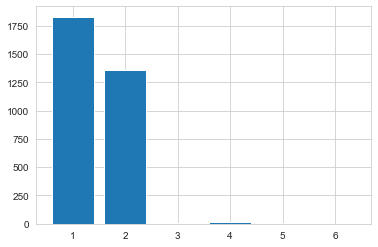

In [112]:
value_mapping=test_invoiceData["predicted_bucket"].value_counts().to_dict()
keys = value_mapping.keys()
values = value_mapping. values()
plt. bar(keys, values)
# Let's see which bucket has the highest number of invoices.
# By this we can observe that the Bucket 1 has highest no. of invoices which lie in the range i.e. less than or equal to zero days delay.